In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
glass = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", header = None) 
glass.shape

(214, 11)

The dataset contains 214 rows and 11 columns. Out of 11 variables one is target variable and the remaining 10 are independent variables

In [3]:
glass.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.dtypes # Data types of the dataset

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

There are two datatypes one is int and another is float. There are no misinterpretation with the dataset

In [5]:
# Checking for null values
glass.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

We can say that there are null values in the dataset

In [6]:
#Checking for number of unique value counts
glass[10].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: 10, dtype: int64

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This gives us the brief information about our the dataset where there are 214 entries, 11 columns, and non null values we can say that the dataset do not contain null values

 Here you can see that out of 214 observations window glass (class 1-4) has observations of 70,76,17 and non window-glass(5-7) has 13,9,29 observations respectively.

Here we can see most of the data is in 1 and 2 categories of the glasses. Hence we can say that the data is imbalanced

In [8]:
glass[0]

0        1
1        2
2        3
3        4
4        5
      ... 
209    210
210    211
211    212
212    213
213    214
Name: 0, Length: 214, dtype: int64

In [9]:
#Dropping the index column since it contains no significant data except index
glass.drop([0], axis = 1, inplace = True)

In [10]:
glass

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Attribute information:

1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

In [11]:
# Changing column names 
glass_columns = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']
glass.columns = glass_columns
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Statistical Summary of Glass dataset 

In [12]:
glass.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The above method gives us the statistical summary of our dataset.
1. There are no null values in the dataset
2. The mean value of 'Mg', 'K' and 'Si' are less than the median of it and hence we can say that the data might be skewed left 
3. The mean value of 'Na','Al', 'Ca' and 'Ba' is greater than the median of it and hence we can say that the data might be skewed right 
4.There is huge difference between third quartile and max value of Na, K, Ca, Ba columns. Hence there might be outliers in these columns.



### Data Visualisation

Univariate analysis

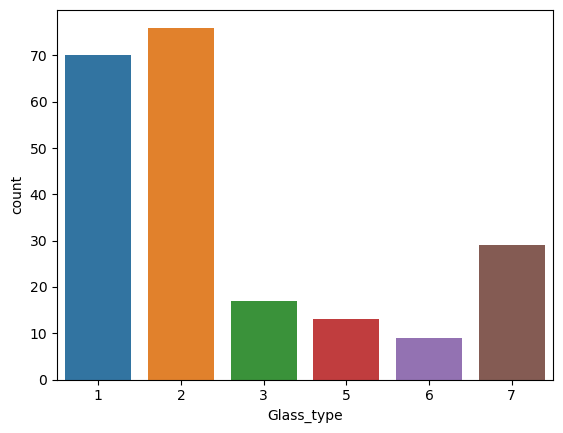

In [13]:
sns.countplot(x = 'Glass_type', data = glass)
plt.show()

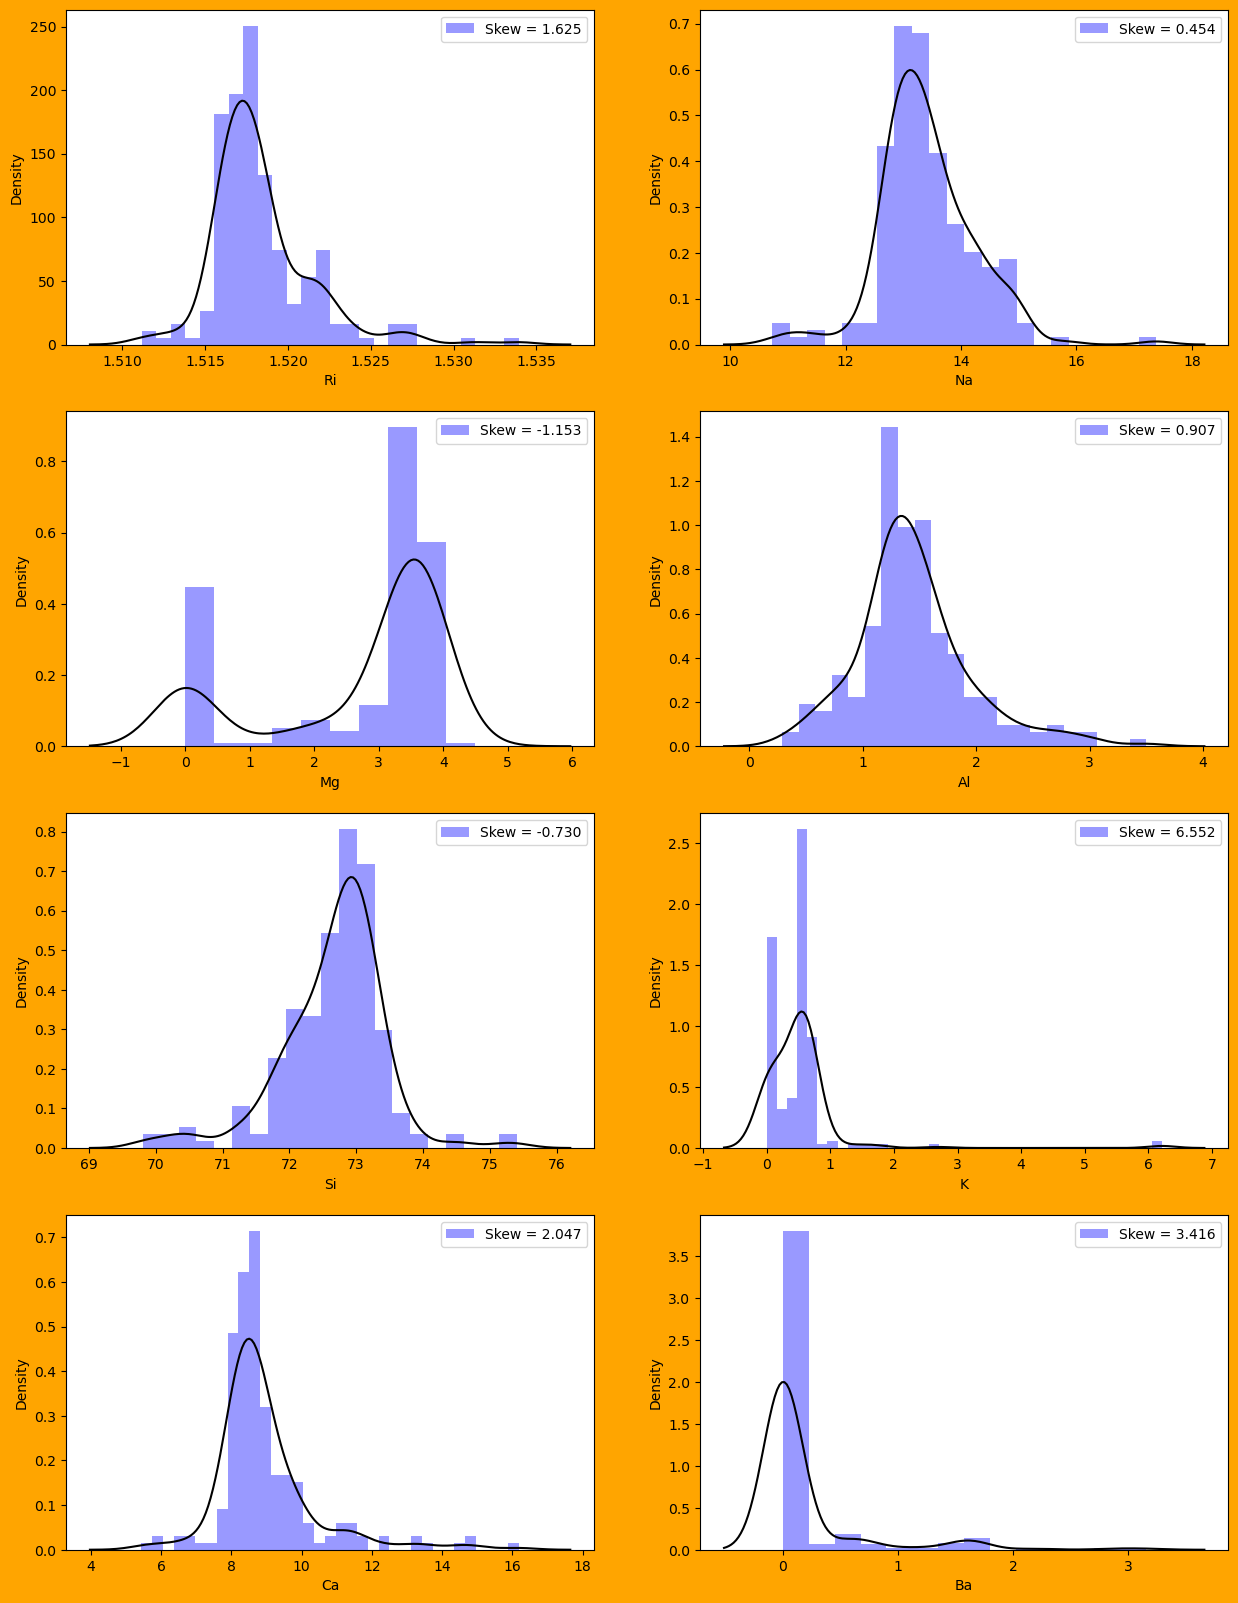

In [14]:
plt.figure(figsize = (15,20), facecolor = 'orange')
c = 1
for i in glass:
    skew = glass[i].skew()
    if c<=8:
        plt.subplot(4,2,c)
        sns.distplot(glass[i], color = 'blue', kde = 'True',kde_kws = {'color': 'black'},label='Skew = %.3f' %(skew))
        plt.xlabel(i, fontsize = 10)
        plt.legend(loc='best')
    c+=1
plt.show()

From the above distribution plot of all the columns we can say that
1. 'Mg', 'Si'columns has skewed left
2. 'Ri','Na', 'Al', 'k', 'Ca', 'Ba' columns has skewed right
3. And also we can observe that 'Ri', 'Na', 'Al', 'Si', 'k','Ca', 'Ba' columns might have outliers
4. None of the features are normally distributed

The default / acceptable skewness lies between -0.5 to 0.5 (not fixed)

Bivariate Analysis

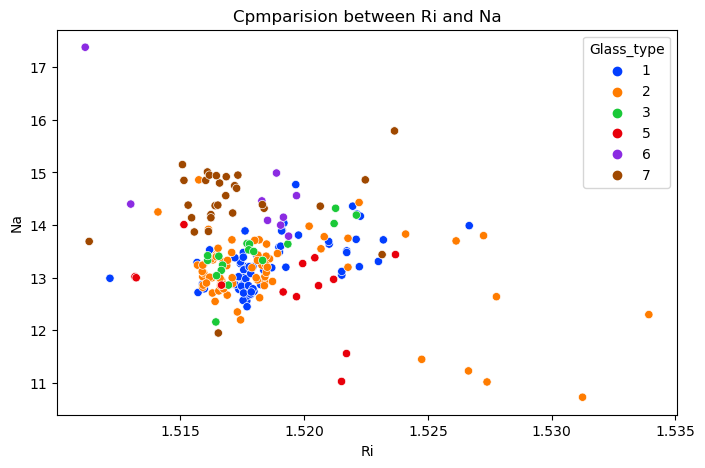

In [15]:
#Comparing between Refractive index and Sodium levels
ax = plt.figure(figsize = (8,5))
plt.title('Cpmparision between Ri and Na')
sns.scatterplot(x = 'Ri', y = 'Na', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

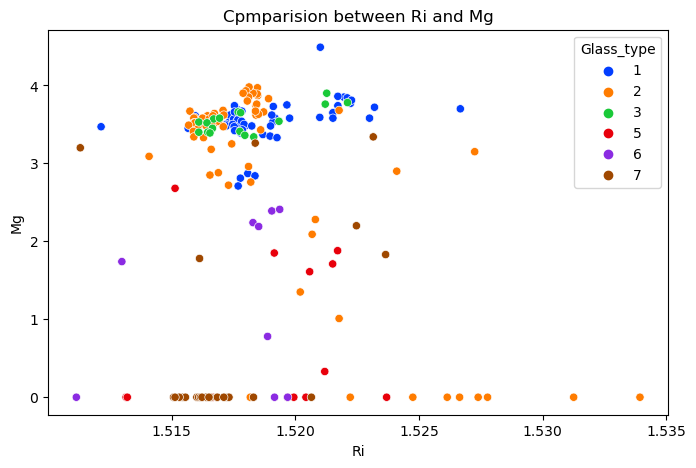

In [16]:
#Comparing between Refractive index and Magnesium levels
ax = plt.figure(figsize = (8,5))
plt.title('Cpmparision between Ri and Mg')
sns.scatterplot(x = 'Ri', y = 'Mg', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

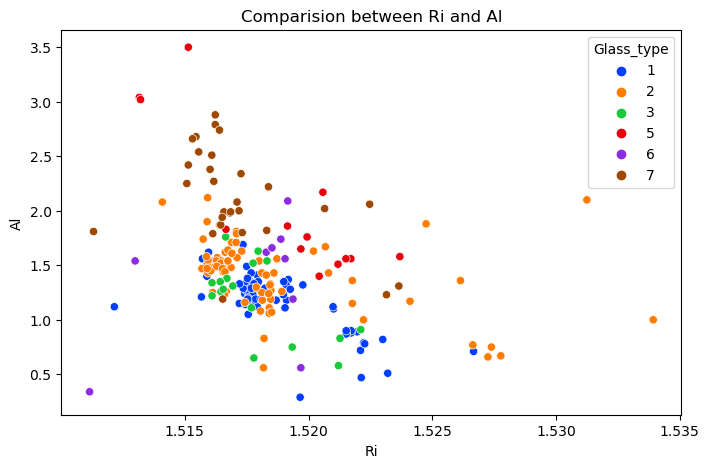

In [17]:
#Comparing between Refractive index and Aluminium levels with respect to type of glass
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between Ri and Al')
sns.scatterplot(x = 'Ri', y = 'Al', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

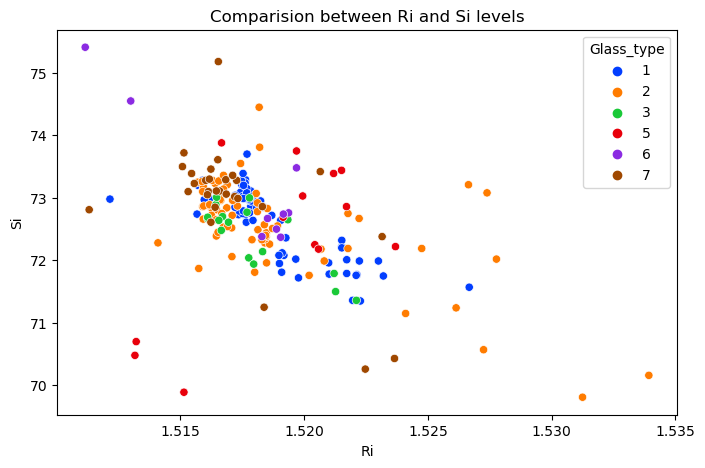

In [18]:
#Comparing between Refractive index and Silicon levels with respect to type of glass
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between Ri and Si levels')
sns.scatterplot(x = 'Ri', y = 'Si', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

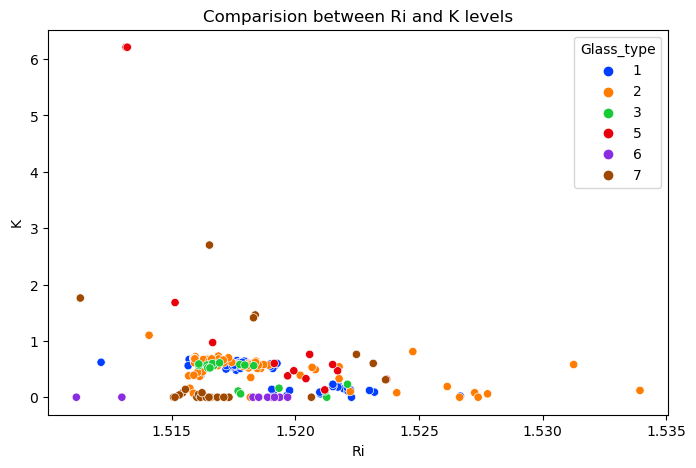

In [19]:
#Comparing between Refractive index and potasium levels with respect to type of glass
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between Ri and K levels')
sns.scatterplot(x = 'Ri', y = 'K', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

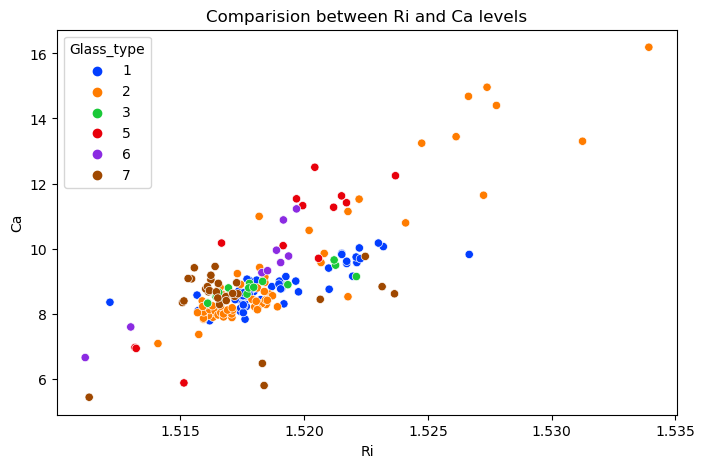

In [20]:
#Comparing between Refractive index and calcium levels with respect to type of glass
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between Ri and Ca levels')
sns.scatterplot(x = 'Ri', y = 'Ca', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

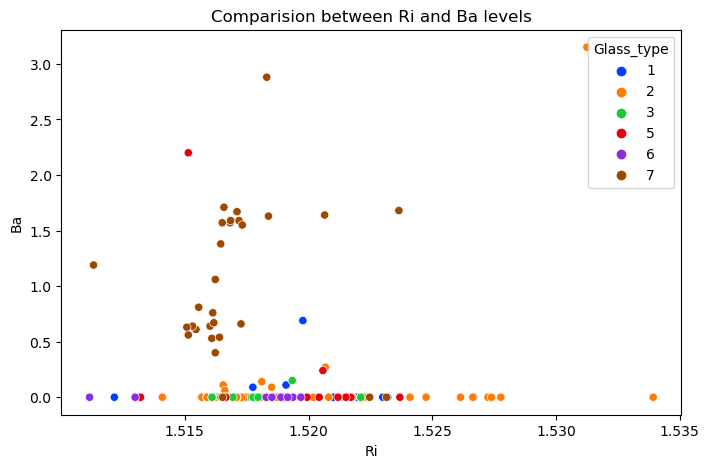

In [21]:
#Comparing between Refractive index and Barium levels with respect to type of glass
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between Ri and Ba levels')
sns.scatterplot(x = 'Ri', y = 'Ba', hue = 'Glass_type', data = glass, palette = 'bright')
plt.show()

### Multivariate Analysis

<Figure size 2500x3000 with 0 Axes>

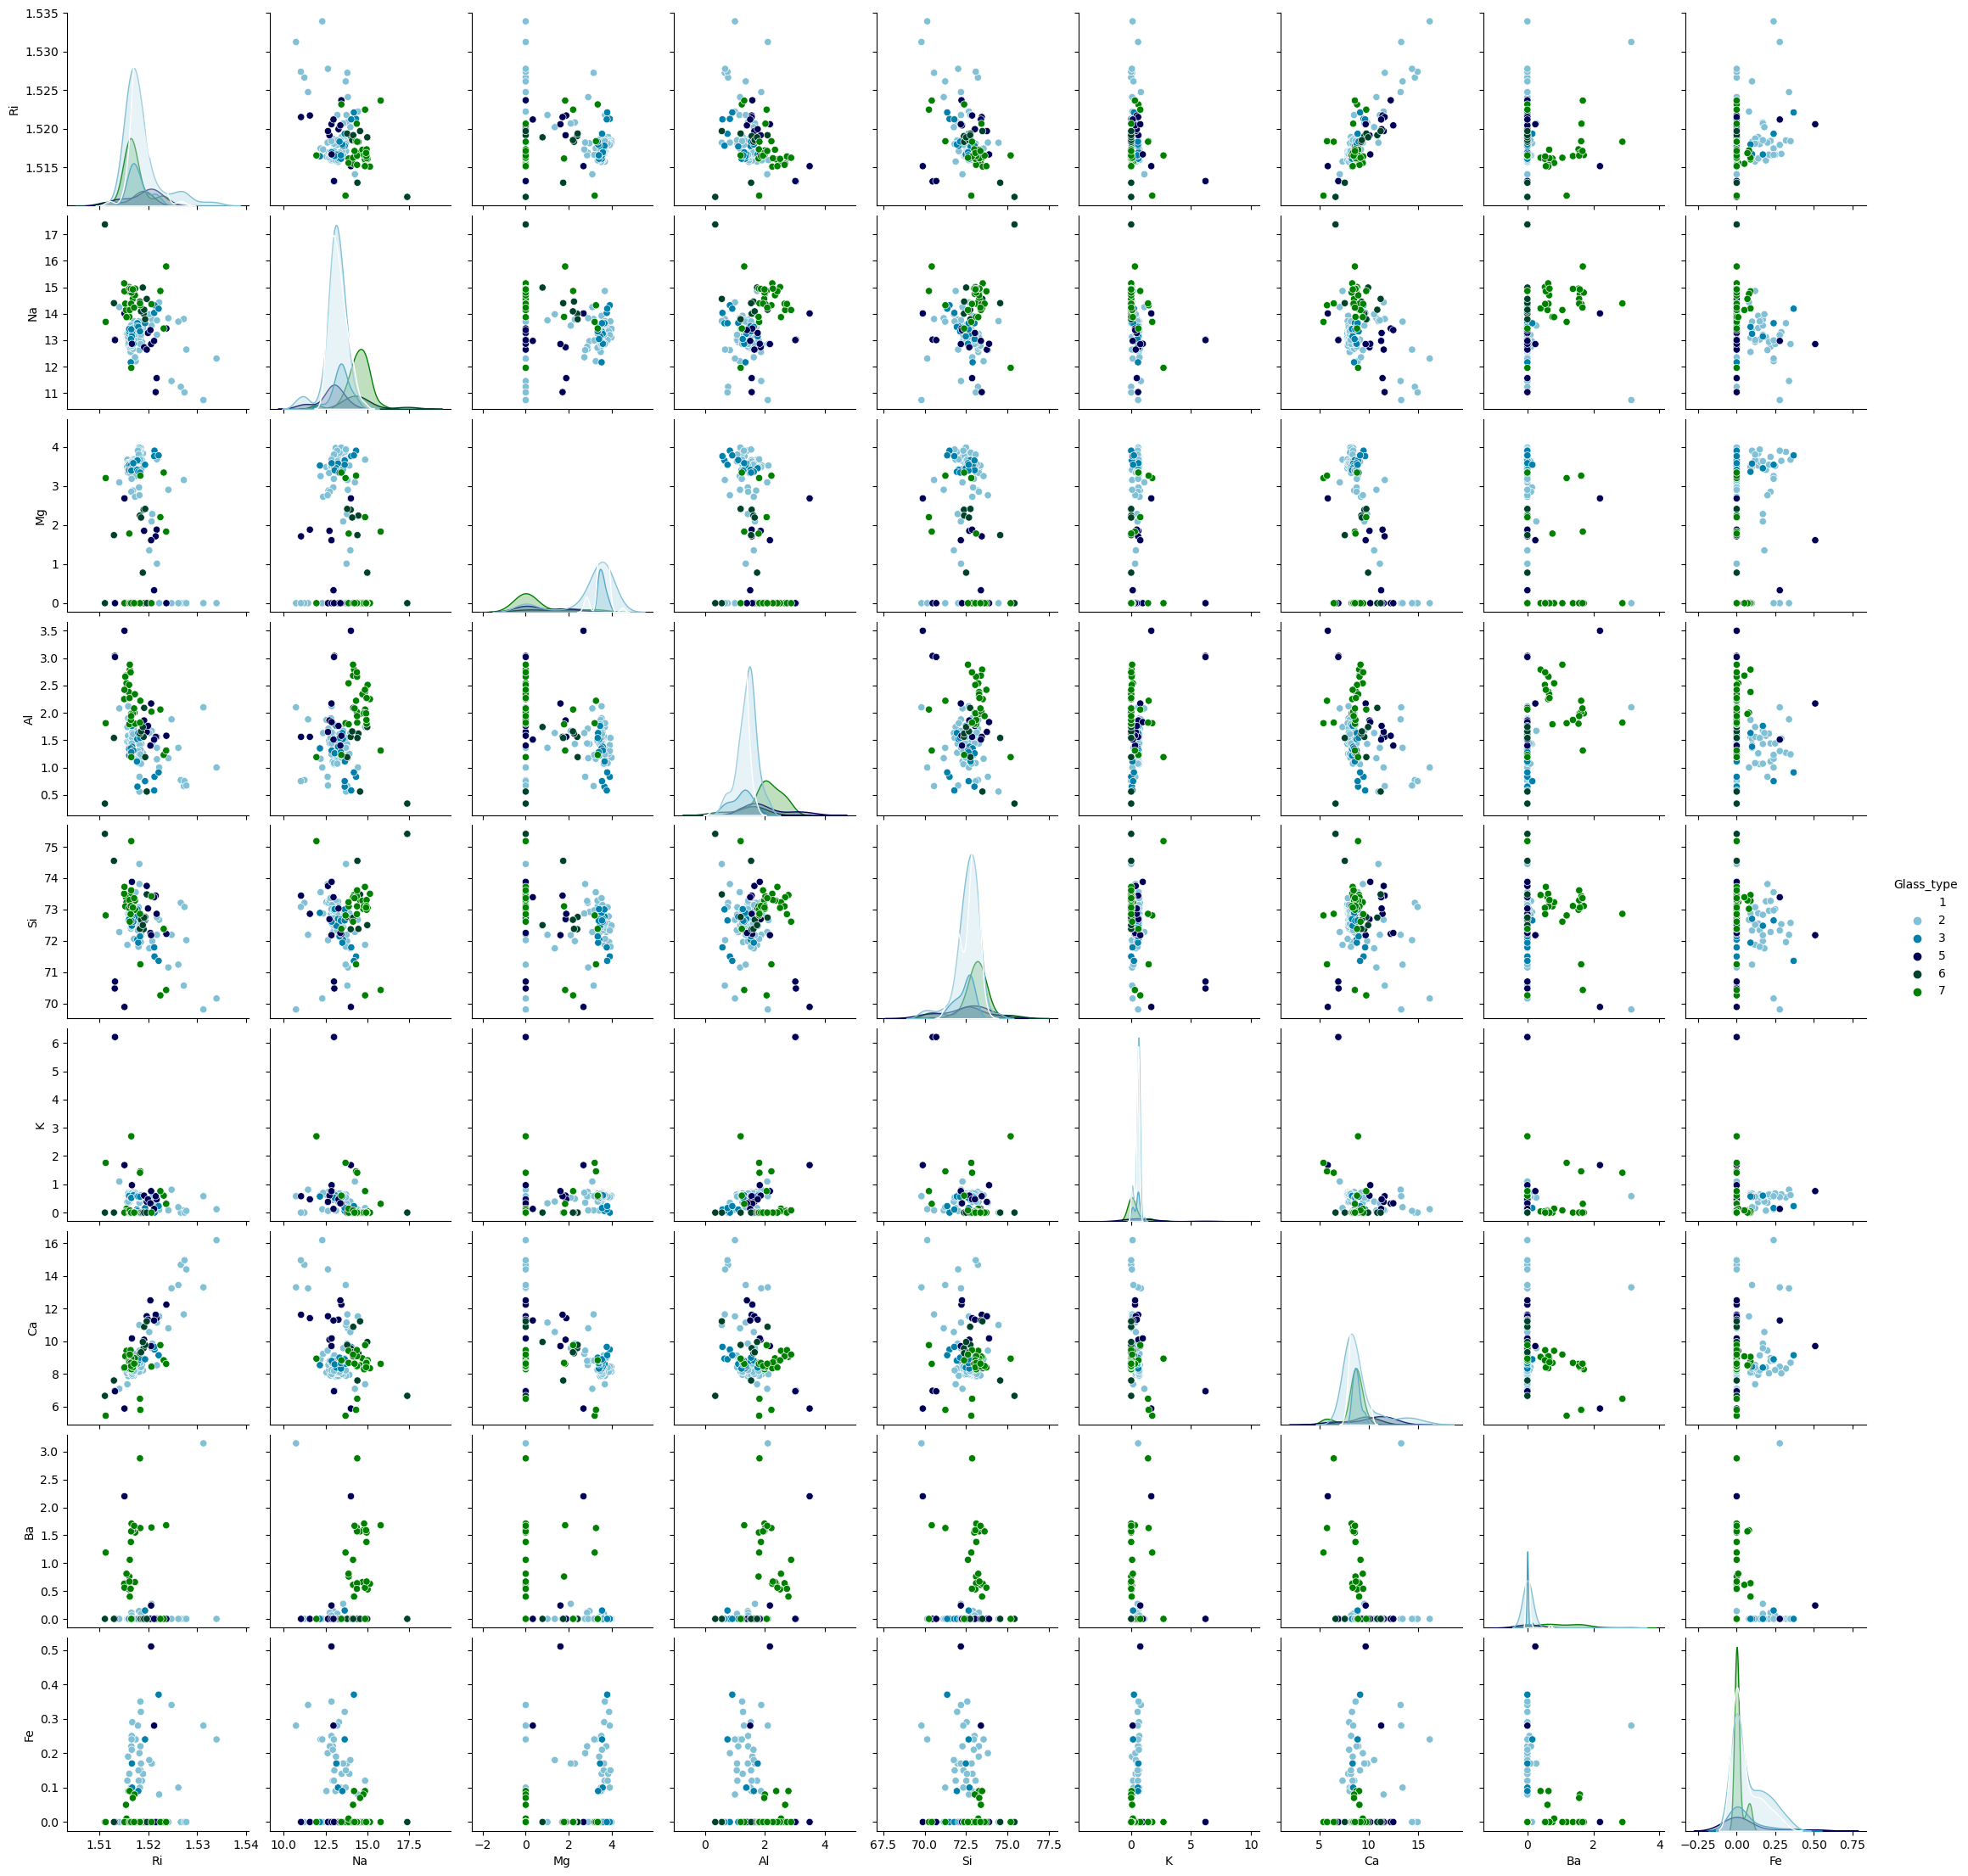

In [22]:
plt.figure(figsize = (25,30))
sns.pairplot(glass, hue = 'Glass_type', palette = 'ocean_r')
plt.show()

### Checking outliers

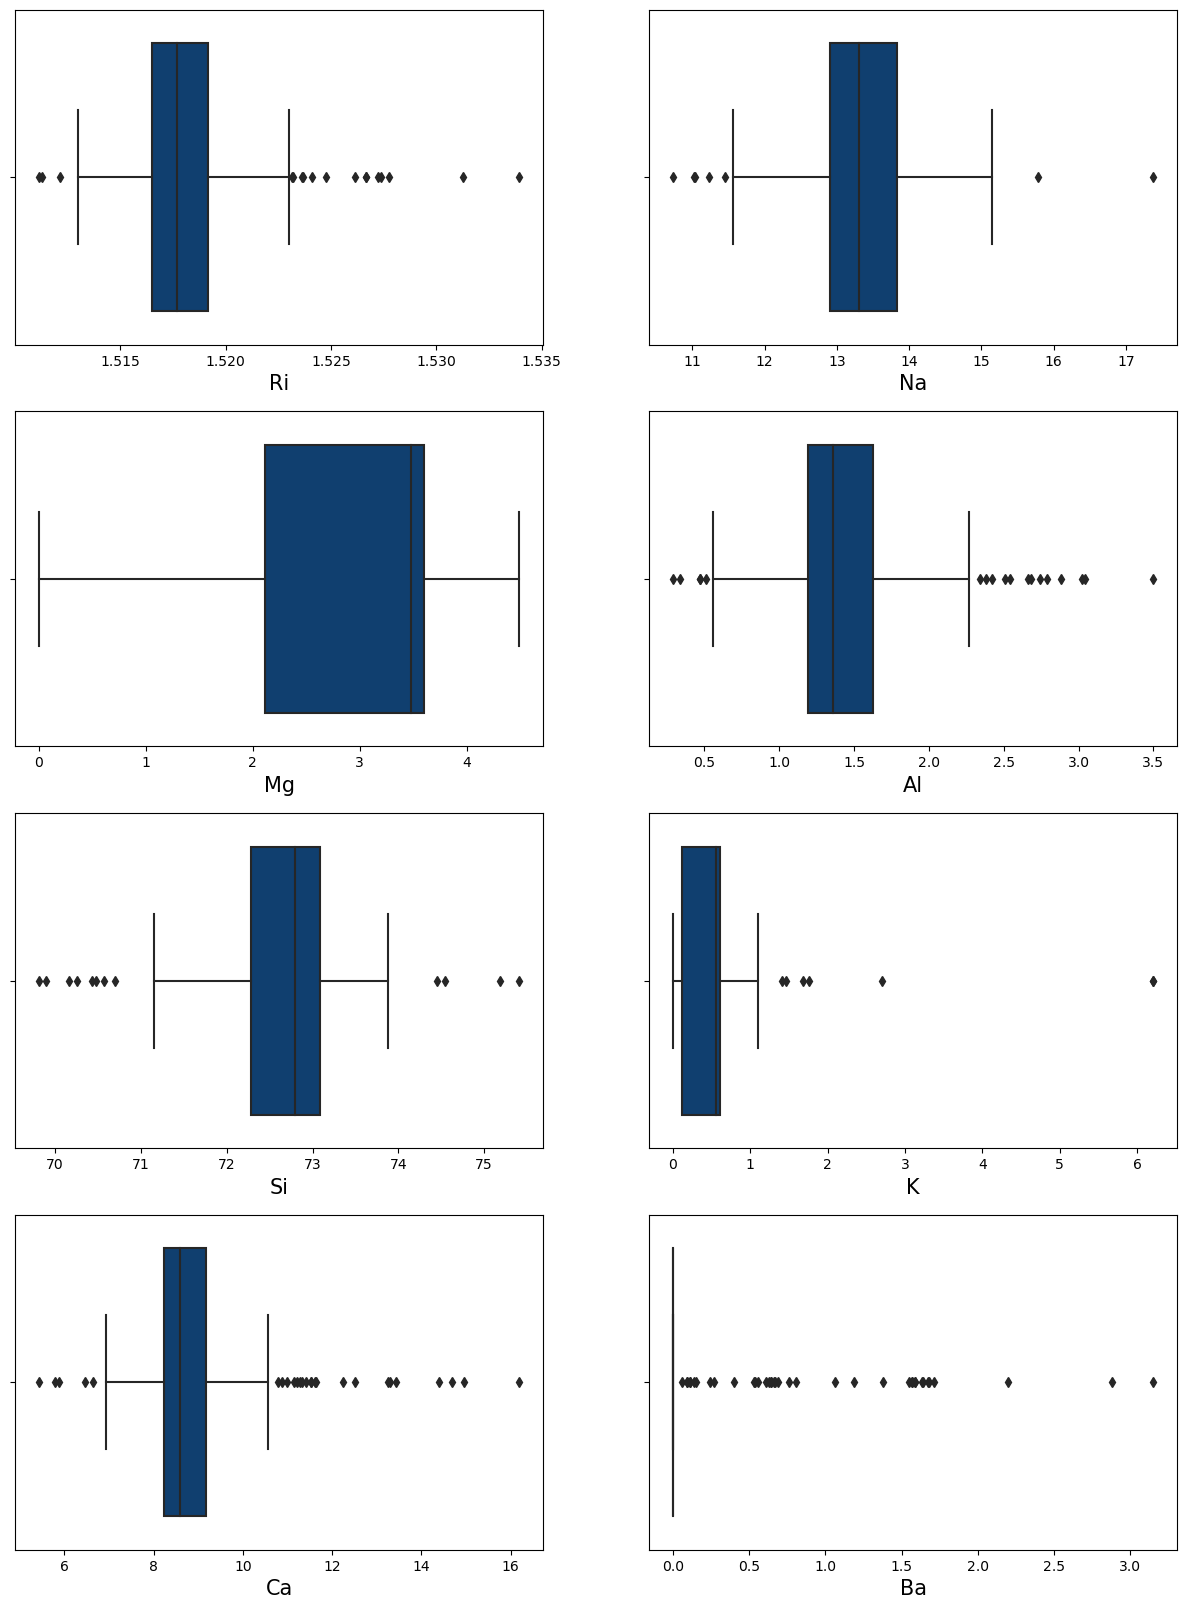

In [23]:
plt.figure(figsize = (15,20))
c = 1
for i in glass:
    if c<=8:
        plt.subplot(4,2,c)
        sns.boxplot(glass[i],palette = 'ocean_r')
        plt.xlabel(i,fontsize = 15)
    c+=1
plt.show()

From the above plot we can say that except 'Mg' column all the other features got outliers, 'K' and 'Ba' having the highest outliers

In [24]:
# Removing skewness of the columns

In [25]:
features = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']
target = ['Glass_type']

In [26]:
glass[features].skew()

Ri    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

From above method we get to know that all the features should be deskewed, We shall remove skewness using cuberoot method

In [27]:
cor = glass.corr()
cor

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


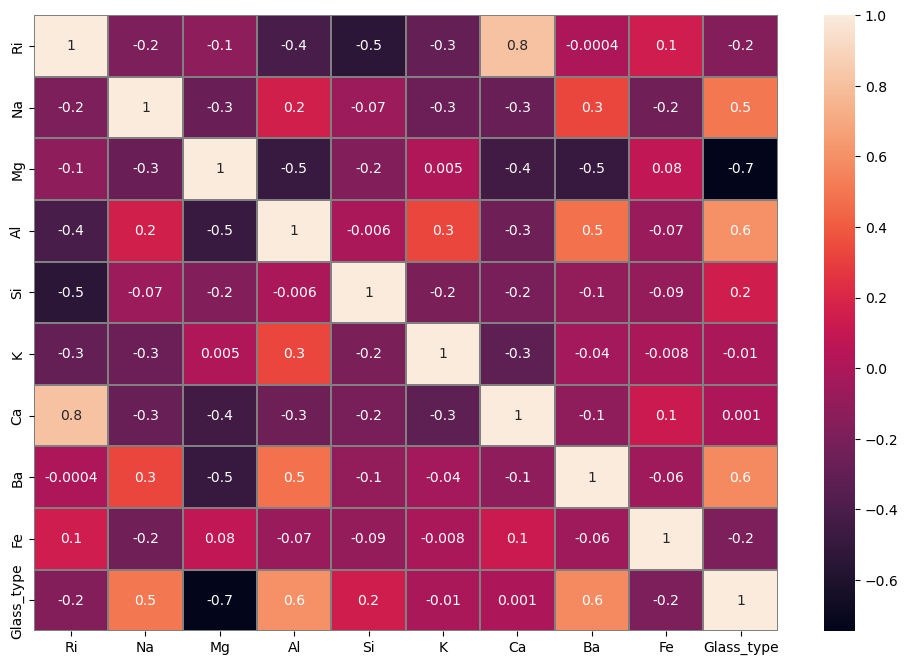

In [28]:
plt.figure(figsize = (12,8))
sns.heatmap(cor,linewidths = 0.1, fmt = ".1g",linecolor = "grey", annot = True)
plt.show()

1.AI and Ba have intermediate correlation between each other.
2.RI and Ca have strong correlation between each other. 

In [29]:
from scipy.stats import zscore
feature = glass[features]
z = np.abs(zscore(feature))
z

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [30]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [31]:
df = glass[(z<3).all(axis=1)]
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
x = df.drop('Glass_type', axis = 1)
y = df['Glass_type']

In [34]:
x.sample(10)

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.0,0.06
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.0,0.11
77,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.0,0.00
125,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.0,0.12
153,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.0,0.00
129,1.52020,13.98,1.35,1.63,71.76,0.39,10.56,0.0,0.18
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.0,0.00
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24


In [35]:
print(x.shape)
print(y.shape)

(194, 9)
(194,)


In [36]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


In [37]:
# Finding vif in each
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,5.632389,Ri
1,44.471428,Na
2,172.914812,Mg
3,21.083266,Al
4,34.478918,Si
5,11.284209,K
6,104.913151,Ca
7,14.102161,Ba
8,1.105388,Fe


In [38]:
y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Glass_type, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method

In [39]:
#Oversampling the data SMOTE is applied on feature and target variable and not on training data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [40]:
#checking value counts after oversampling
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Glass_type, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.9761904761904762 at random_state 6


In [42]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [43]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import  cross_val_score

In [44]:
# Checking accuracy score for RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(x_train,y_train)
predc = rs.predict(x_test)
print((accuracy_score(y_test,predc))*100)
print(confusion_matrix(y_test, predc))
print(classification_report(y_test,predc))

96.82539682539682
[[16  2  0  0  0  0]
 [ 0 17  2  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       0.89      0.89      0.89        19
           3       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24

    accuracy                           0.97       126
   macro avg       0.97      0.96      0.96       126
weighted avg       0.97      0.97      0.97       126



In [45]:
#Checking accuracy score for logisticregression
ls = LogisticRegression()
ls.fit(x_train,y_train)
predd = ls.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8809523809523809
[[ 9  7  2  0  0  0]
 [ 4 13  2  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.69      0.50      0.58        18
           2       0.65      0.68      0.67        19
           3       0.83      1.00      0.91        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24

    accuracy                           0.88       126
   macro avg       0.86      0.86      0.86       126
weighted avg       0.88      0.88      0.88       126



In [46]:
sv = SVC()
sv.fit(x_train,y_train)
predd = sv.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8809523809523809
[[ 8  9  1  0  0  0]
 [ 1 17  1  0  0  0]
 [ 2  1 17  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.73      0.44      0.55        18
           2       0.63      0.89      0.74        19
           3       0.89      0.85      0.87        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24

    accuracy                           0.88       126
   macro avg       0.88      0.86      0.86       126
weighted avg       0.89      0.88      0.88       126



In [47]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
predd = gd.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.9444444444444444
[[15  1  0  1  0  1]
 [ 1 16  2  0  0  0]
 [ 1  0 19  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.88      0.83      0.86        18
           2       0.94      0.84      0.89        19
           3       0.90      0.95      0.93        20
           5       0.96      1.00      0.98        24
           6       1.00      1.00      1.00        21
           7       0.96      1.00      0.98        24

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.94      0.94      0.94       126



In [48]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
predd = ad.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.3888888888888889
[[17  0  0  0  0  1]
 [19  0  0  0  0  0]
 [19  0  0  0  1  0]
 [ 0 24  0  0  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0 13 11]]
              precision    recall  f1-score   support

           1       0.31      0.94      0.47        18
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        24
           6       0.60      1.00      0.75        21
           7       0.92      0.46      0.61        24

    accuracy                           0.39       126
   macro avg       0.30      0.40      0.30       126
weighted avg       0.32      0.39      0.31       126



In [49]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
predd = bg.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.9285714285714286
[[15  1  1  0  0  1]
 [ 3 14  2  0  0  0]
 [ 1  0 19  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.93      0.74      0.82        19
           3       0.86      0.95      0.90        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       0.96      1.00      0.98        24

    accuracy                           0.93       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.93      0.93      0.93       126



In [50]:
ex = ExtraTreesClassifier()
ex.fit(x_train,y_train)
predd = ex.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.9682539682539683
[[15  3  0  0  0  0]
 [ 0 18  1  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        18
           2       0.86      0.95      0.90        19
           3       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24

    accuracy                           0.97       126
   macro avg       0.97      0.96      0.96       126
weighted avg       0.97      0.97      0.97       126



In [51]:
score = cross_val_score(rs,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.89285714 0.86904762 0.88095238 0.80952381 0.9047619 ]
0.8714285714285716
Difference between Accuracy Score and cross validation score is -  0.0968253968253967


In [52]:
# cross validation score for Logistic Regression
score = cross_val_score(ls, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.83333333 0.80952381 0.86904762 0.79761905 0.86904762]
0.8357142857142857
Difference between Accuracy Score and cross validation score is -  0.1325396825396825


In [53]:
# cross validation score for Support Vector Machine
score = cross_val_score(sv, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.82142857 0.83333333 0.83333333 0.86904762 0.85714286]
0.8428571428571429
Difference between Accuracy Score and cross validation score is -  0.1253968253968254


In [54]:
# cross validation score for GradientBoosting Classifier
score = cross_val_score(gd, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.88095238 0.88095238 0.9047619  0.79761905 0.86904762]
0.8666666666666668
Difference between Accuracy Score and cross validation score is -  0.10158730158730145


In [55]:
# cross validation score for Ada Boost Classifier
score = cross_val_score(ad, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.32142857 0.5        0.5        0.38095238 0.36904762]
0.41428571428571426
Difference between Accuracy Score and cross validation score is -  0.553968253968254


In [56]:
# cross validation score for Bagging Classifier
score = cross_val_score(bg, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.85714286 0.82142857 0.9047619  0.77380952 0.9047619 ]
0.8523809523809524
Difference between Accuracy Score and cross validation score is -  0.1158730158730159


In [57]:
# cross validation score for Etra Tree Classifier
score = cross_val_score(ex, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.9047619  0.88095238 0.8452381  0.80952381 0.91666667]
0.8714285714285716
Difference between Accuracy Score and cross validation score is -  0.0968253968253967


By evaluating the cross validation scores for all the classification algorithm we conclude that Random forest Classifier is the best algorithm since the differnece between accuracy score and validation score is least

In [58]:
# Each classification algorithm is having different parameters for gridsearch cv
# Extra Tree Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
               'random_state': [10,50,100,250],
               'max_depth': [10,20,30,50],
               'min_samples_split':[2,3,5,4],
               'n_estimators': [50,75,80,90,100]}

In [59]:
gcv = GridSearchCV(RandomForestClassifier(), parameters, cv = 3)
gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 50],
                         'min_samples_split': [2, 3, 5, 4],
                         'n_estimators': [50, 75, 80, 90, 100],
                         'random_state': [10, 50, 100, 250]})

In [60]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 3,
 'n_estimators': 50,
 'random_state': 50}

In [61]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 10, n_estimators = 75, min_samples_split = 3, random_state = 10)
Final_model.fit(x_train,y_train)
predict = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

16.666666666666664


In [62]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Glass_prediction.pkl")


['Glass_prediction.pkl']

In [63]:
#predicting the saved model
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([7, 5, 5, 6, 3, 1, 5, 1, 1, 1, 6, 1, 1, 6, 7, 7, 6, 5, 3, 2, 5, 7,
       1, 1, 5, 1, 6, 3, 5, 3, 7, 7, 6, 7, 6, 7, 7, 1, 6, 1, 6, 1, 1, 2,
       7, 7, 5, 5, 1, 5, 1, 7, 3, 5, 3, 1, 3, 2, 1, 5, 1, 2, 6, 1, 6, 1,
       7, 2, 2, 1, 1, 6, 6, 2, 2, 7, 5, 3, 6, 2, 5, 7, 5, 5, 2, 7, 6, 5,
       7, 1, 6, 1, 1, 6, 7, 3, 7, 7, 5, 3, 2, 5, 2, 2, 1, 7, 5, 2, 1, 2,
       6, 2, 7, 5, 3, 5, 7, 6, 2, 2, 1, 5, 7, 5, 6, 6], dtype=int64)

In [64]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a

In [65]:
df

,Predicted,Original
0,7,7
1,5,5
2,5,5
3,6,6
4,3,3
...,...,...
121,5,5
122,7,7
123,5,5
124,6,6
